In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [4]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df['diagnosis'] = cancer_df['target'].map({0: 'malignant', 1: 'benign'})

In [5]:
print("------- Iris Dataset -------")
print(f"Shape: {iris_df.shape}")
print(iris_df.head())
print(iris_df.info())
print(iris_df.isnull().sum())

print("\n------- Cancer Dataset -------")
print(f"Shape: {cancer_df.shape}")
print(cancer_df.head())
print(cancer_df.info())
print(cancer_df.isnull().sum())

------- Iris Dataset -------
Shape: (150, 6)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width

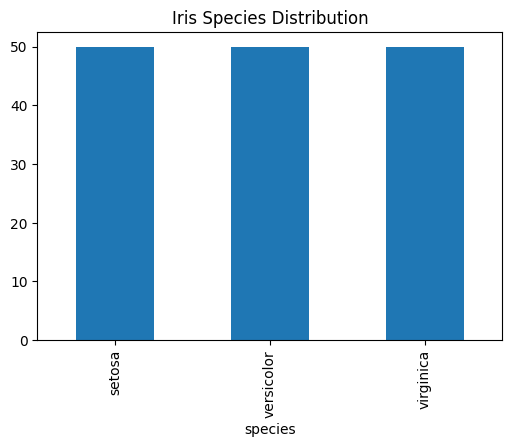

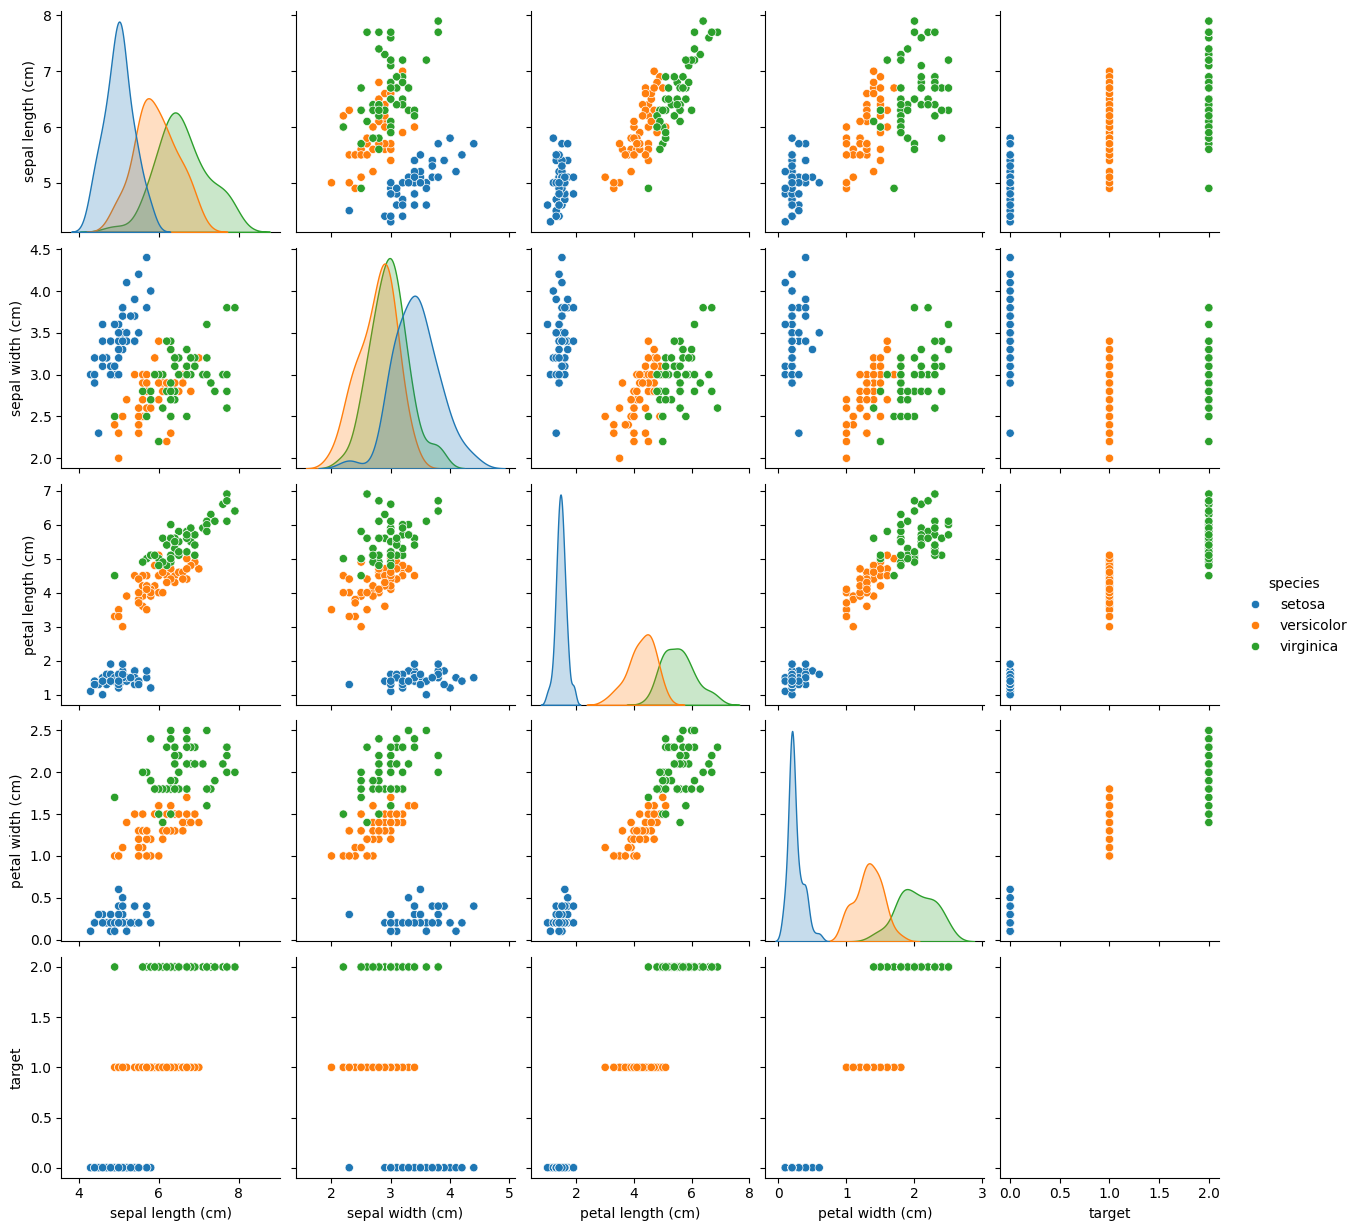

In [25]:
plt.figure(figsize=(6, 4))
iris_df['species'].value_counts().plot(kind='bar')
plt.title('Iris Species Distribution')
plt.show()


sns.pairplot(iris_df, hue='species', height=2.5)
plt.show()

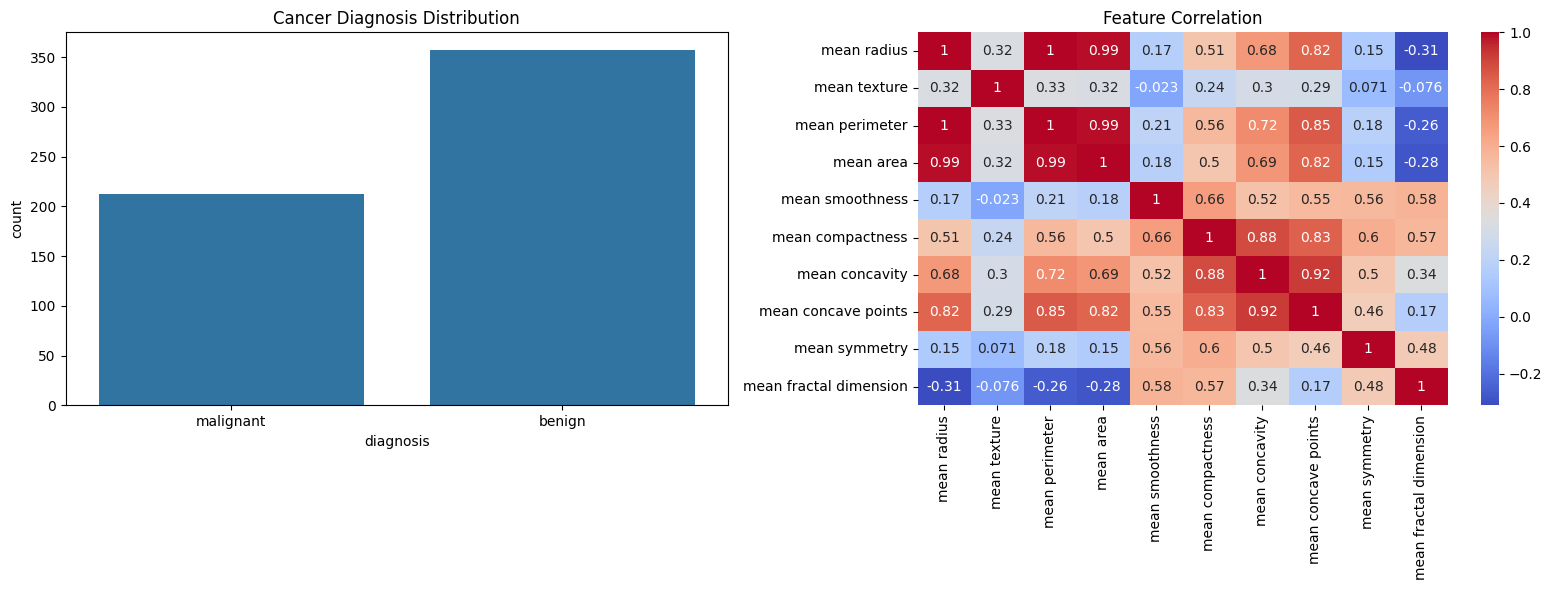

In [24]:
important_features = cancer_df.columns[:10]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='diagnosis', data=cancer_df, ax=axes[0])
axes[0].set_title('Cancer Diagnosis Distribution')

sns.heatmap(
    cancer_df[important_features].corr(),
    annot=True,
    cmap='coolwarm',
    ax=axes[1]
)
axes[1].set_title('Feature Correlation')

plt.tight_layout()
plt.show()


In [9]:
X_iris = iris.data
y_iris = iris.target

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris)


In [10]:
scaler_iris = StandardScaler()
X_iris_train_scaled = scaler_iris.fit_transform(X_iris_train)
X_iris_test_scaled = scaler_iris.transform(X_iris_test)

In [11]:
X_cancer = cancer.data
y_cancer = cancer.target


X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer)

In [12]:
scaler_cancer = StandardScaler()
X_cancer_train_scaled = scaler_cancer.fit_transform(X_cancer_train)
X_cancer_test_scaled = scaler_cancer.transform(X_cancer_test)

In [13]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='linear', random_state=42)
}

In [14]:

iris_results = {}

for name, model in models.items():
    print(f"\n------- {name} - Iris Dataset -------")

    start_time = time.time()
    model.fit(X_iris_train_scaled, y_iris_train)
    training_time = time.time() - start_time
    start_time = time.time()

    y_pred_train = model.predict(X_iris_train_scaled)
    y_pred_test = model.predict(X_iris_test_scaled)
    prediction_time = time.time() - start_time

    train_accuracy = accuracy_score(y_iris_train, y_pred_train)
    test_accuracy = accuracy_score(y_iris_test, y_pred_test)

    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"Prediction Time: {prediction_time:.4f} seconds")

    iris_results[name] = {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'training_time': training_time,
        'prediction_time': prediction_time,
        'y_pred_test': y_pred_test
    }


------- Logistic Regression - Iris Dataset -------
Training Accuracy: 0.9583
Test Accuracy: 0.9333
Training Time: 0.0202 seconds
Prediction Time: 0.0005 seconds

------- Decision Tree - Iris Dataset -------
Training Accuracy: 1.0000
Test Accuracy: 0.9333
Training Time: 0.0042 seconds
Prediction Time: 0.0004 seconds

------- Naive Bayes - Iris Dataset -------
Training Accuracy: 0.9583
Test Accuracy: 0.9667
Training Time: 0.0010 seconds
Prediction Time: 0.0005 seconds

------- SVM - Iris Dataset -------
Training Accuracy: 0.9750
Test Accuracy: 1.0000
Training Time: 0.0030 seconds
Prediction Time: 0.0007 seconds


In [15]:
cancer_results = {}

for name, model in models.items():
    print(f"\n------- {name} - Cancer Dataset -------")

    if name == 'Logistic Regression':
        model = LogisticRegression(random_state=42)
    elif name == 'Decision Tree':
        model = DecisionTreeClassifier(random_state=42)
    elif name == 'Naive Bayes':
        model = GaussianNB()
    elif name == 'SVM':
        model = SVC(kernel='linear', random_state=42)

    start_time = time.time()
    model.fit(X_cancer_train_scaled, y_cancer_train)
    training_time = time.time() - start_time

    start_time = time.time()
    y_pred_train = model.predict(X_cancer_train_scaled)
    y_pred_test = model.predict(X_cancer_test_scaled)
    prediction_time = time.time() - start_time


    train_accuracy = accuracy_score(y_cancer_train, y_pred_train)
    test_accuracy = accuracy_score(y_cancer_test, y_pred_test)

    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"Prediction Time: {prediction_time:.4f} seconds")


    cancer_results[name] = {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'training_time': training_time,
        'prediction_time': prediction_time,
        'y_pred_test': y_pred_test
    }


------- Logistic Regression - Cancer Dataset -------
Training Accuracy: 0.9890
Test Accuracy: 0.9825
Training Time: 0.0351 seconds
Prediction Time: 0.0027 seconds

------- Decision Tree - Cancer Dataset -------
Training Accuracy: 1.0000
Test Accuracy: 0.9123
Training Time: 0.0239 seconds
Prediction Time: 0.0007 seconds

------- Naive Bayes - Cancer Dataset -------
Training Accuracy: 0.9385
Test Accuracy: 0.9298
Training Time: 0.0023 seconds
Prediction Time: 0.0016 seconds

------- SVM - Cancer Dataset -------
Training Accuracy: 0.9912
Test Accuracy: 0.9737
Training Time: 0.0199 seconds
Prediction Time: 0.0089 seconds


------- DETAILED EVALUATION - IRIS DATASET -------

--- Logistic Regression ---


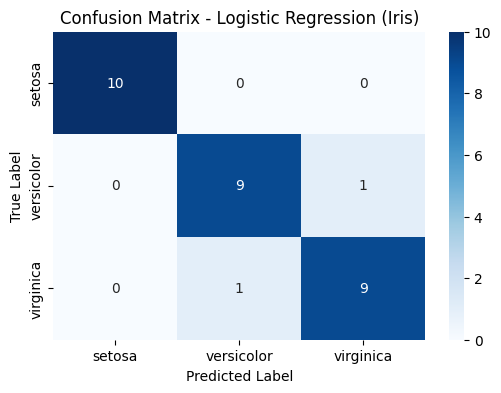

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


--- Decision Tree ---


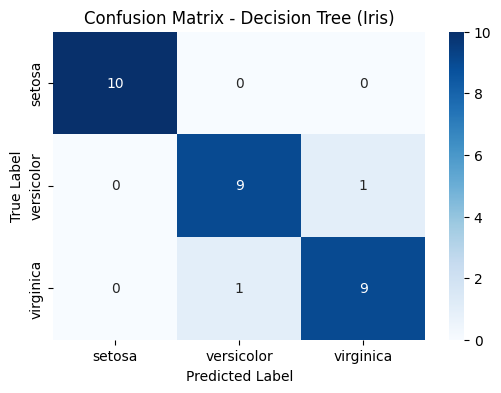

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


--- Naive Bayes ---


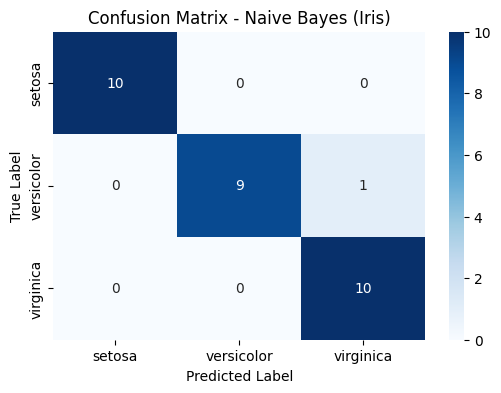

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


--- SVM ---


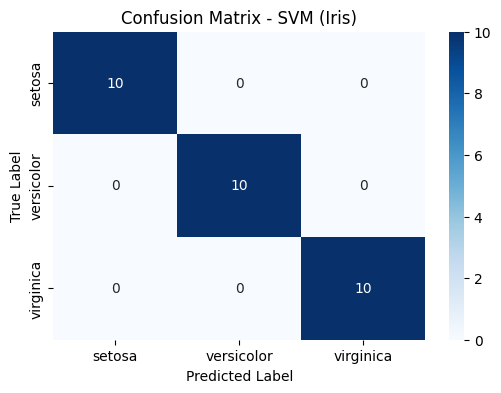

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [16]:
print("------- DETAILED EVALUATION - IRIS DATASET -------")

for name, result in iris_results.items():
    print(f"\n--- {name} ---")

    cm = confusion_matrix(y_iris_test, result['y_pred_test'])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names,
                yticklabels=iris.target_names)
    plt.title(f'Confusion Matrix - {name} (Iris)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    print("Classification Report:")
    print(classification_report(y_iris_test, result['y_pred_test'],
                              target_names=iris.target_names))


------- DETAILED EVALUATION - CANCER DATASET -------

--- Logistic Regression ---


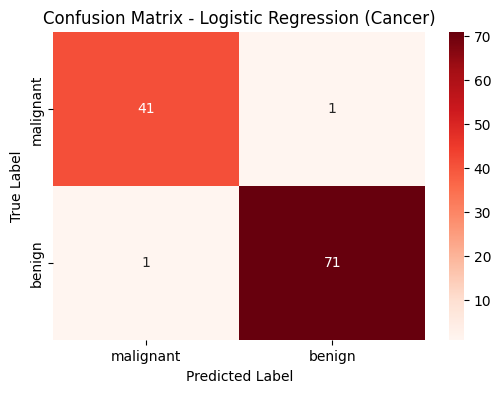

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


--- Decision Tree ---


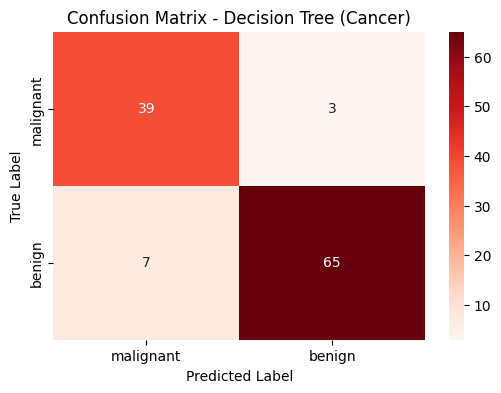

Classification Report:
              precision    recall  f1-score   support

   malignant       0.85      0.93      0.89        42
      benign       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114


--- Naive Bayes ---


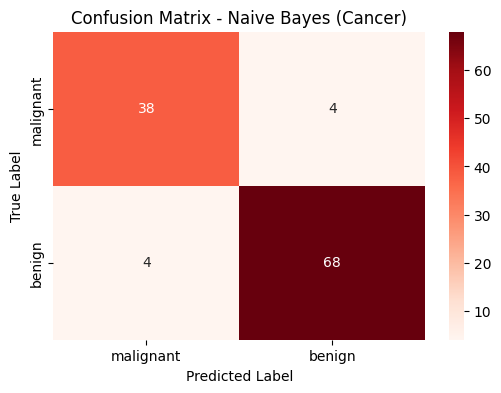

Classification Report:
              precision    recall  f1-score   support

   malignant       0.90      0.90      0.90        42
      benign       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


--- SVM ---


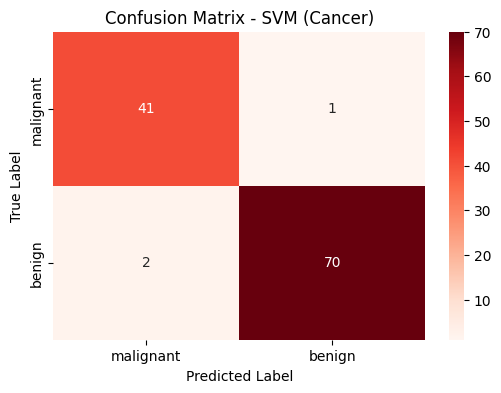

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.98      0.96        42
      benign       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [17]:
print("------- DETAILED EVALUATION - CANCER DATASET -------")

for name, result in cancer_results.items():
    print(f"\n--- {name} ---")

    cm = confusion_matrix(y_cancer_test, result['y_pred_test'])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
                xticklabels=cancer.target_names,
                yticklabels=cancer.target_names)
    plt.title(f'Confusion Matrix - {name} (Cancer)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    print("Classification Report:")
    print(classification_report(y_cancer_test, result['y_pred_test'],
                              target_names=cancer.target_names))


In [18]:
print("------- CROSS-VALIDATION - IRIS DATASET -------")

iris_cv_results = {}

for name, model in models.items():

    if name == 'Logistic Regression':
        model = LogisticRegression(random_state=42)
    elif name == 'Decision Tree':
        model = DecisionTreeClassifier(random_state=42)
    elif name == 'Naive Bayes':
        model = GaussianNB()
    elif name == 'SVM':
        model = SVC(kernel='linear', random_state=42)

    cv_scores = cross_val_score(model, X_iris_train_scaled, y_iris_train,
                               cv=5, scoring='accuracy')

    iris_cv_results[name] = {
        'cv_scores': cv_scores,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }

    print(f"{name}:")
    print(f"  CV Scores: {cv_scores}")
    print(f"  CV Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"  Test Accuracy: {iris_results[name]['test_accuracy']:.4f}")
    print()


------- CROSS-VALIDATION - IRIS DATASET -------
Logistic Regression:
  CV Scores: [0.91666667 0.95833333 0.95833333 0.95833333 1.        ]
  CV Mean: 0.9583 (+/- 0.0527)
  Test Accuracy: 0.9333

Decision Tree:
  CV Scores: [0.91666667 0.95833333 0.95833333 0.95833333 0.91666667]
  CV Mean: 0.9417 (+/- 0.0408)
  Test Accuracy: 0.9333

Naive Bayes:
  CV Scores: [0.91666667 0.95833333 1.         0.95833333 0.95833333]
  CV Mean: 0.9583 (+/- 0.0527)
  Test Accuracy: 0.9667

SVM:
  CV Scores: [0.95833333 0.95833333 0.95833333 1.         1.        ]
  CV Mean: 0.9750 (+/- 0.0408)
  Test Accuracy: 1.0000



In [19]:
print("------- CROSS-VALIDATION - CANCER DATASET -------")

cancer_cv_results = {}

for name, model in models.items():

    if name == 'Logistic Regression':
        model = LogisticRegression(random_state=42)
    elif name == 'Decision Tree':
        model = DecisionTreeClassifier(random_state=42)
    elif name == 'Naive Bayes':
        model = GaussianNB()
    elif name == 'SVM':
        model = SVC(kernel='linear', random_state=42)

    cv_scores = cross_val_score(model, X_cancer_train_scaled, y_cancer_train,
                               cv=5, scoring='accuracy')

    cancer_cv_results[name] = {
        'cv_scores': cv_scores,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }

    print(f"{name}:")
    print(f"  CV Scores: {cv_scores}")
    print(f"  CV Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"  Test Accuracy: {cancer_results[name]['test_accuracy']:.4f}")
    print()


------- CROSS-VALIDATION - CANCER DATASET -------
Logistic Regression:
  CV Scores: [0.96703297 0.97802198 0.96703297 1.         0.98901099]
  CV Mean: 0.9802 (+/- 0.0256)
  Test Accuracy: 0.9825

Decision Tree:
  CV Scores: [0.91208791 0.9010989  0.9010989  0.89010989 0.94505495]
  CV Mean: 0.9099 (+/- 0.0378)
  Test Accuracy: 0.9123

Naive Bayes:
  CV Scores: [0.93406593 0.93406593 0.93406593 0.93406593 0.92307692]
  CV Mean: 0.9319 (+/- 0.0088)
  Test Accuracy: 0.9298

SVM:
  CV Scores: [0.95604396 0.95604396 0.95604396 0.98901099 0.97802198]
  CV Mean: 0.9670 (+/- 0.0278)
  Test Accuracy: 0.9737



In [20]:
comparison_data = []

for name in models.keys():
    comparison_data.append({
        'Dataset': 'Iris',
        'Model': name,
        'Test Accuracy': iris_results[name]['test_accuracy'],
        'CV Mean': iris_cv_results[name]['cv_mean'],
        'Training Time': iris_results[name]['training_time'],
        'Prediction Time': iris_results[name]['prediction_time']
    })

for name in models.keys():
    comparison_data.append({
        'Dataset': 'Cancer',
        'Model': name,
        'Test Accuracy': cancer_results[name]['test_accuracy'],
        'CV Mean': cancer_cv_results[name]['cv_mean'],
        'Training Time': cancer_results[name]['training_time'],
        'Prediction Time': cancer_results[name]['prediction_time']
    })

comparison_df = pd.DataFrame(comparison_data)
print("------- COMPREHENSIVE COMPARISON -------")
print(comparison_df.to_string(index=False))


------- COMPREHENSIVE COMPARISON -------
Dataset               Model  Test Accuracy  CV Mean  Training Time  Prediction Time
   Iris Logistic Regression       0.933333 0.958333       0.020156         0.000500
   Iris       Decision Tree       0.933333 0.941667       0.004234         0.000415
   Iris         Naive Bayes       0.966667 0.958333       0.001000         0.000482
   Iris                 SVM       1.000000 0.975000       0.003023         0.000656
 Cancer Logistic Regression       0.982456 0.980220       0.035083         0.002735
 Cancer       Decision Tree       0.912281 0.909890       0.023873         0.000665
 Cancer         Naive Bayes       0.929825 0.931868       0.002343         0.001644
 Cancer                 SVM       0.973684 0.967033       0.019939         0.008861


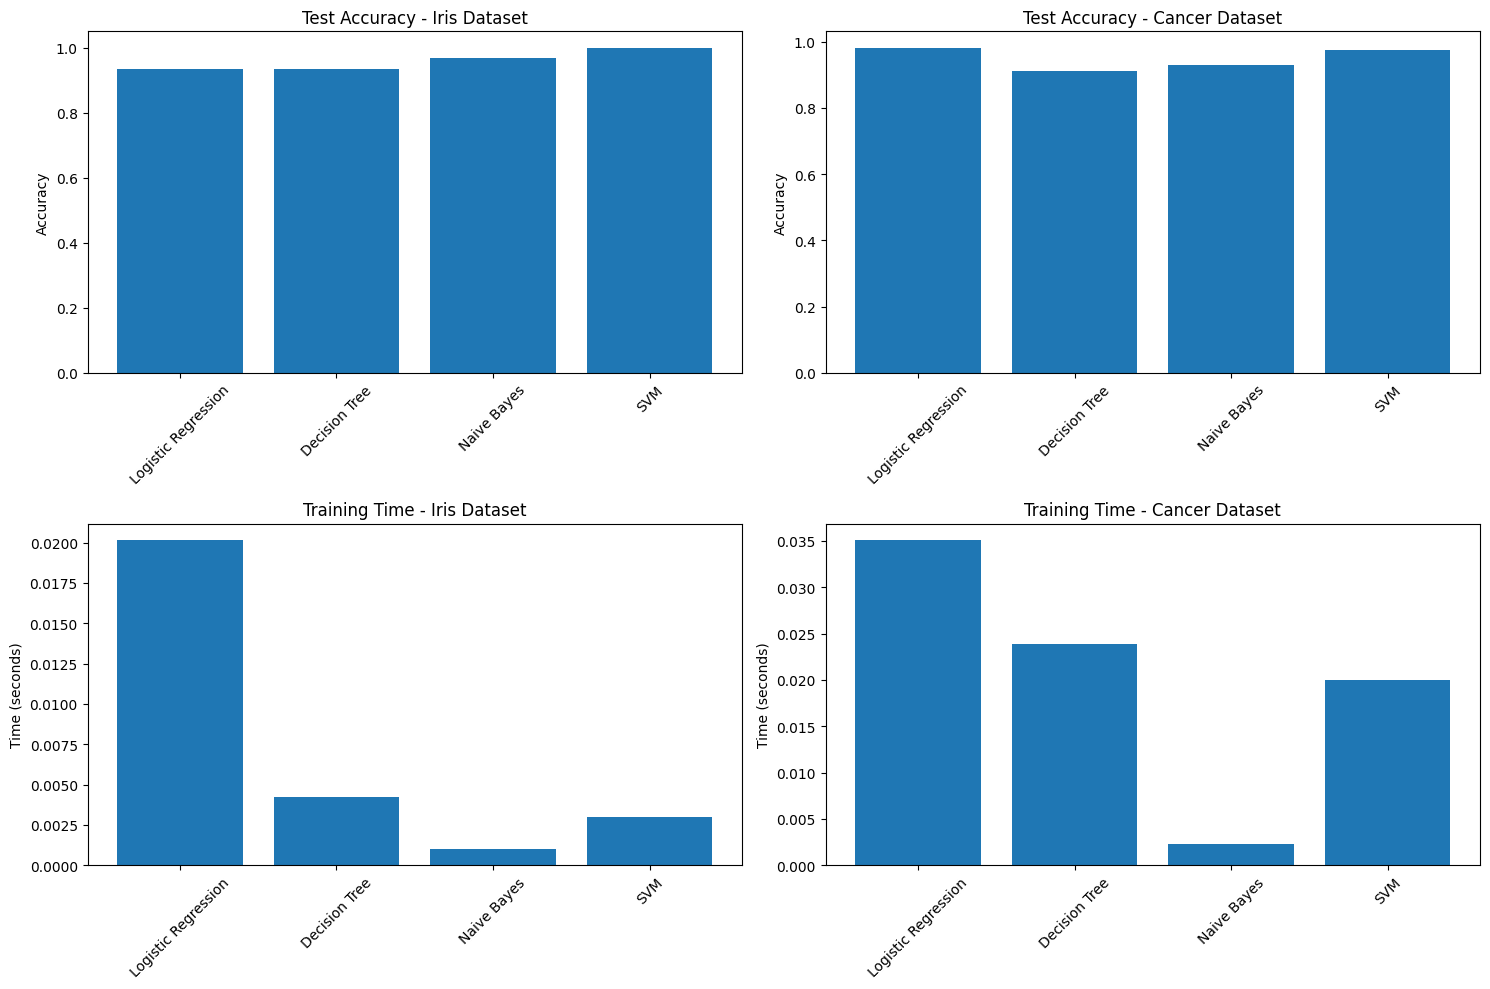

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

iris_test_acc = [iris_results[name]['test_accuracy'] for name in models.keys()]
axes[0, 0].bar(models.keys(), iris_test_acc)
axes[0, 0].set_title('Test Accuracy - Iris Dataset')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)

cancer_test_acc = [cancer_results[name]['test_accuracy'] for name in models.keys()]
axes[0, 1].bar(models.keys(), cancer_test_acc)
axes[0, 1].set_title('Test Accuracy - Cancer Dataset')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].tick_params(axis='x', rotation=45)

iris_train_time = [iris_results[name]['training_time'] for name in models.keys()]
axes[1, 0].bar(models.keys(), iris_train_time)
axes[1, 0].set_title('Training Time - Iris Dataset')
axes[1, 0].set_ylabel('Time (seconds)')
axes[1, 0].tick_params(axis='x', rotation=45)

cancer_train_time = [cancer_results[name]['training_time'] for name in models.keys()]
axes[1, 1].bar(models.keys(), cancer_train_time)
axes[1, 1].set_title('Training Time - Cancer Dataset')
axes[1, 1].set_ylabel('Time (seconds)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [22]:
print("------- ANALYSIS AND RECOMMENDATIONS -------")

print("\nBest Models by Dataset:")

best_iris_model = max(iris_results.keys(),
                     key=lambda x: iris_results[x]['test_accuracy'])
print(f"Iris Dataset: {best_iris_model} "
      f"(Accuracy: {iris_results[best_iris_model]['test_accuracy']:.4f})")

best_cancer_model = max(cancer_results.keys(),
                       key=lambda x: cancer_results[x]['test_accuracy'])
print(f"Cancer Dataset: {best_cancer_model} "
      f"(Accuracy: {cancer_results[best_cancer_model]['test_accuracy']:.4f})")

print("\nPerformance Analysis:")
print("1. Accuracy Performance")
print("2. Time Complexity")
print("3. Cross-Validation Stability")
print("4. Deployment Recommendations")


------- ANALYSIS AND RECOMMENDATIONS -------

Best Models by Dataset:
Iris Dataset: SVM (Accuracy: 1.0000)
Cancer Dataset: Logistic Regression (Accuracy: 0.9825)

Performance Analysis:
1. Accuracy Performance
2. Time Complexity
3. Cross-Validation Stability
4. Deployment Recommendations
